# Creating Shot Map in Python

## Getting data from Statsbomb API

In [68]:
from statsbombpy import sb

# Get the Champions League final 2004-2005. AC Milan - FC Liverpool. 3-3. Liverpool won on penalty kicks
sb.competitions()
sb.matches(competition_id = 16, season_id = 37)
events = sb.events(match_id = 2302764)
events

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",AC Milan,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4411, 'lineup': [{'player': {'id...",Liverpool,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AC Milan,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AC Milan,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:06:11.998,Player Off,NaN
4644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AC Milan,00:14:47.323,Referee Ball-Drop,NaN
4645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:15:38.588,Player On,NaN
4646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:06:34.026,Player On,NaN


### Clear data

- Select only one team (Liverpool).
- Split location to separate columns for x and y coordinates

In [91]:
# Get unique team names
team1, team2 = events['team'].unique()

# Create mask to filter Liverpool shots
mask_team2 = (events['type'] == 'Shot') & (events['team'] == team2)
df_shots_liv = events.loc[mask_team2, ['team', 'player', 'minute', 'second', 'type', 'location', 'shot_end_location', 'shot_outcome', 'shot_type', 'shot_statsbomb_xg']]
df_shots_liv.head()

,team,player,minute,second,type,location,shot_end_location,shot_outcome,shot_type,shot_statsbomb_xg
4134,Liverpool,John Arne Semundseth Riise,3,48,Shot,"[98.4, 33.3]","[107.1, 38.5]",Blocked,Open Play,0.027243
4135,Liverpool,Sami Hyypiä,3,57,Shot,"[106.9, 44.4]","[119.2, 41.9, 0.6]",Saved,Open Play,0.018038
4140,Liverpool,Milan Baroš,29,13,Shot,"[98.0, 38.3]","[120.0, 42.2, 5.9]",Off T,Open Play,0.041778
4141,Liverpool,Luis Javier García Sanz,32,36,Shot,"[97.2, 29.1]","[120.0, 42.3, 6.5]",Off T,Open Play,0.026821
4142,Liverpool,Luis Javier García Sanz,35,37,Shot,"[101.7, 36.1]","[120.0, 55.3, 0.5]",Off T,Open Play,0.080985


In [92]:
# Split location column to x, y columns, and drop location column
df_shots_liv[['x','y']] = df_shots_liv['location'].to_list()
df_shots_liv.drop('location', axis=1, inplace=True)

# # Split shot_end_location column to endX and endY columns, and drop shot_end_location column
endLocations = df_shots_liv['shot_end_location'].to_list()
endLocations = list(map(lambda arr: arr[0:2], endLocations))
df_shots_liv[['endX','endY']] = endLocations
df_shots_liv.drop('shot_end_location', axis=1, inplace=True)

# # Rename shot_outcome column to just outcome
df_shots_liv.rename(columns={'shot_outcome': 'outcome'}, inplace=True)
df_shots_liv.rename(columns={'shot_statsbomb_xg': 'shot_xg'}, inplace=True)
df_shots_liv.head(10)

,team,player,minute,second,type,outcome,shot_type,shot_xg,x,y,endX,endY
4134,Liverpool,John Arne Semundseth Riise,3,48,Shot,Blocked,Open Play,0.027243,98.4,33.3,107.1,38.5
4135,Liverpool,Sami Hyypiä,3,57,Shot,Saved,Open Play,0.018038,106.9,44.4,119.2,41.9
4140,Liverpool,Milan Baroš,29,13,Shot,Off T,Open Play,0.041778,98.0,38.3,120.0,42.2
4141,Liverpool,Luis Javier García Sanz,32,36,Shot,Off T,Open Play,0.026821,97.2,29.1,120.0,42.3
4142,Liverpool,Luis Javier García Sanz,35,37,Shot,Off T,Open Play,0.080985,101.7,36.1,120.0,55.3
4148,Liverpool,Xabier Alonso Olano,49,31,Shot,Off T,Open Play,0.013036,82.3,51.9,120.0,35.1
4150,Liverpool,Steven Gerrard,53,4,Shot,Goal,Open Play,0.055449,109.8,34.0,120.0,42.9
4151,Liverpool,Vladimir Smicer,55,2,Shot,Goal,Open Play,0.024584,95.7,50.6,120.0,37.3
4152,Liverpool,Xabier Alonso Olano,56,50,Shot,Blocked,Open Play,0.011653,92.9,50.4,108.1,38.7
4153,Liverpool,Xabier Alonso Olano,59,50,Shot,Saved,Penalty,0.760000,107.9,39.9,120.0,37.4


In [94]:
# Clear shoot-out shots
mask_shoot_out = (df_shots_liv['minute'] >= 120) & (df_shots_liv['shot_type'] == 'Penalty')
df_shots_liv = df_shots_liv.drop(df_shots_liv.loc[mask_shoot_out].index)
df_shots_liv

,team,player,minute,second,type,outcome,shot_type,shot_xg,x,y,endX,endY
4134,Liverpool,John Arne Semundseth Riise,3,48,Shot,Blocked,Open Play,0.027243,98.4,33.3,107.1,38.5
4135,Liverpool,Sami Hyypiä,3,57,Shot,Saved,Open Play,0.018038,106.9,44.4,119.2,41.9
4140,Liverpool,Milan Baroš,29,13,Shot,Off T,Open Play,0.041778,98.0,38.3,120.0,42.2
4141,Liverpool,Luis Javier García Sanz,32,36,Shot,Off T,Open Play,0.026821,97.2,29.1,120.0,42.3
4142,Liverpool,Luis Javier García Sanz,35,37,Shot,Off T,Open Play,0.080985,101.7,36.1,120.0,55.3
4148,Liverpool,Xabier Alonso Olano,49,31,Shot,Off T,Open Play,0.013036,82.3,51.9,120.0,35.1
4150,Liverpool,Steven Gerrard,53,4,Shot,Goal,Open Play,0.055449,109.8,34.0,120.0,42.9
4151,Liverpool,Vladimir Smicer,55,2,Shot,Goal,Open Play,0.024584,95.7,50.6,120.0,37.3
4152,Liverpool,Xabier Alonso Olano,56,50,Shot,Blocked,Open Play,0.011653,92.9,50.4,108.1,38.7
4153,Liverpool,Xabier Alonso Olano,59,50,Shot,Saved,Penalty,0.760000,107.9,39.9,120.0,37.4


## Plotting

In [95]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, FontManager

In [96]:
rcParams['text.color'] = '#c7d5cc'
# Set general use colors
text_color = 'w'

Text(0.5, 1.0, 'Liverpool shots vs AC Milan. CL Finals 2004/05')

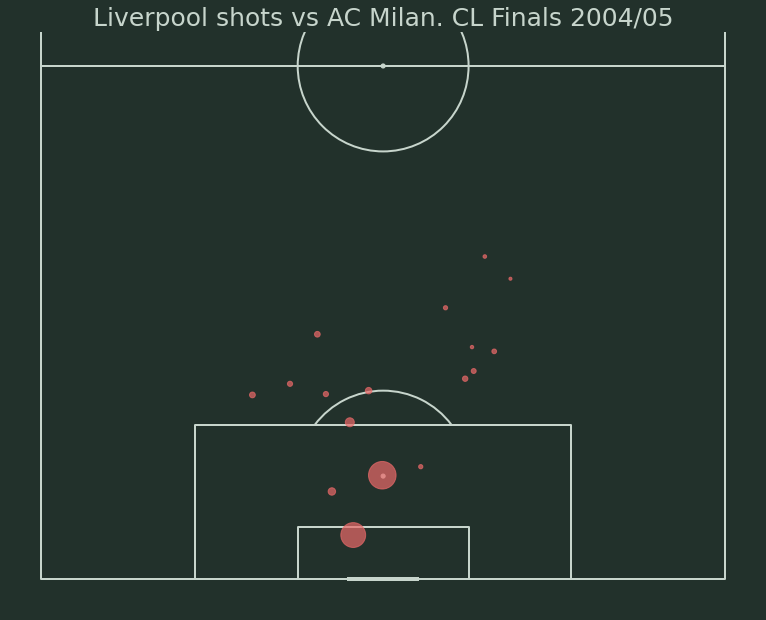

In [98]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', half=True)
fig, ax = pitch.draw(figsize=(13, 8.5), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Show shots at bottom half of the pitch
plt.gca().invert_yaxis()

# Change order for x and y coordinates because of Pitch orientation
plt.scatter(df_shots_liv['y'], df_shots_liv['x'], c = '#ea6969', s = 1000*df_shots_liv['shot_xg'], alpha = .7)

plt.title(f'{team2} shots vs {team1}. CL Finals 2004/05', fontsize=25)

In [99]:
fig.savefig('liverpool-shots-cl-2004-05-final.png')